In [45]:
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def initial_prediction():
    # First we will use the data that has been cleaned in the same fashion as the Data Exploration step of the project
    data = pd.read_csv('HepatitisCdata.csv')
    data['Category'].loc[data['Category'].isin(["0=Blood Donor", "0s=suspect Blood Donor"])] = 1
    data['Category'].loc[data['Category'].isin(["1=Hepatitis", "2=Fibrosis", "3=Cirrhosis"])] = 2
    data = data[data[["ALB", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"]].notnull().all(1)]

    # Now we will set up the variables for the predictive model in the required format
    y_pred = data['Category']
    y_pred = y_pred.astype('int')
    x_pred = data[["ALB", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"]].values

    # Variables for train and test set values can be created. The test_size variable is a critical kwarg that will determine the train set and the success of model,
    x_train, x_test, y_train, y_test = train_test_split(x_pred, y_pred, test_size=0.2)
    '''n_neighbors is set at a relatively high value, as the sparseness of the data requires more comparisons for each item.
    The brute force algorithm was chosen as it tolerates a high n_neighbors value and typically thrives off of small data_sets.'''
    kn = KNeighborsClassifier(n_neighbors=6, algorithm='brute')
    # Next is to train the data set 
    kn.fit(x_train, y_train)
    predicted_results = kn.predict(x_test)
    # Here we print the accuracy of our model's predictions as compared to the actual y axis results.
    return metrics.accuracy_score(y_test, predicted_results)
prediction_accuracies = []
avg_prediction_accuracy = sum(prediction_accuracies)/len(prediction_accuracies
for i in range(10)
    accuracy = initial_prediction()
    prediction_accuracy.append(float(accuracy))
print(f'Initial prediction model's average accuracy over 10 iterations: {avg_prediction_accuracy}')
# This gives good predictive accuracy between tests: roughly 93-96% accuracy.

'''This would be a baseline of insight; there would be a high likelihood of the patient having some liver ailment, but there would be some uncertainty to the progression 
of the liver damage present. For a more detailed prediction, we need to return the categories to their division between (just) hepatitis c, fibrosis, and cirrhosis. Afterward,
the sklearn modelling will be repeated.'''
def detailed_prediction()
    full_data = pd.read_csv('HepatitisCdata.csv')
    full_data['Category'].loc[full_data['Category'].isin(["0=Blood Donor", "0s=suspect Blood Donor"])] = 0
    full_data['Category'].loc[full_data['Category'] == "1=Hepatitis"] = 1 
    full_data['Category'].loc[full_data['Category'] == "2=Fibrosis"] = 2
    full_data['Category'].loc[full_data['Category'] == "3=Cirrhosis"] = 3
    full_data = full_data[full_data[["ALB", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"]].notnull().all(1)]


    y_full_pred = full_data['Category']
    y_full_pred = y_pred.astype('int')
    x_full_pred = full_data[["ALB", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"]].values

    x_train, x_test, y_train, y_test = train_test_split(x_full_pred, y_full_pred, test_size=0.2)
    kn = KNeighborsClassifier(n_neighbors=6, algorithm='brute')
    kn.fit(x_train, y_train)
    predicted_results = kn.predict(x_test)
    return metrics.accuracy_score(y_test, predicted_results)
prediction_accuracies = []
avg_prediction_accuracy = sum(prediction_accuracies)/len(prediction_accuracies
for i in range(10)
    accuracy = detailed_prediction()
    prediction_accuracy.append(float(accuracy))
print(f'Detailed prediction model's average accuracy over 10 iterations: {avg_prediction_accuracy}')

SyntaxError: invalid syntax (<ipython-input-45-ad593e999ac8>, line 31)

## Getting the Data Ready

In [90]:
#Import packages used for dataset
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score


In [91]:
#Load the dataset
data = pd.read_csv('HepatitisCdata.csv')

In [92]:
#find out about data set
print(data.dtypes, data.info(), data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB
Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64

In [93]:
# We are going to drop the rows with na values 
data.dropna(inplace=True)
# What do the rows look like
print(len(data.index), '\n',data.head())

589 
    Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  


In [94]:
#What kind of values are in the Category column
list(set(data['Category']))

['0=Blood Donor',
 '1=Hepatitis',
 '3=Cirrhosis',
 '0s=suspect Blood Donor',
 '2=Fibrosis']

In [95]:
# Though there are many categories, we are breaking it into binary: healthy and not-healthy.
data['Category'].loc[data['Category'].isin(["1=Hepatitis","2=Fibrosis", "3=Cirrhosis"])] = 1
data['Category'].loc[data['Category'].isin(["0=Blood Donor", "0s=suspect Blood Donor"])] = 0

C:\Users\fritz\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Visualizing the Data

In [96]:
column_titles = data.columns
data.columns[4:]
plotting_columns = data.columns[4:]

''

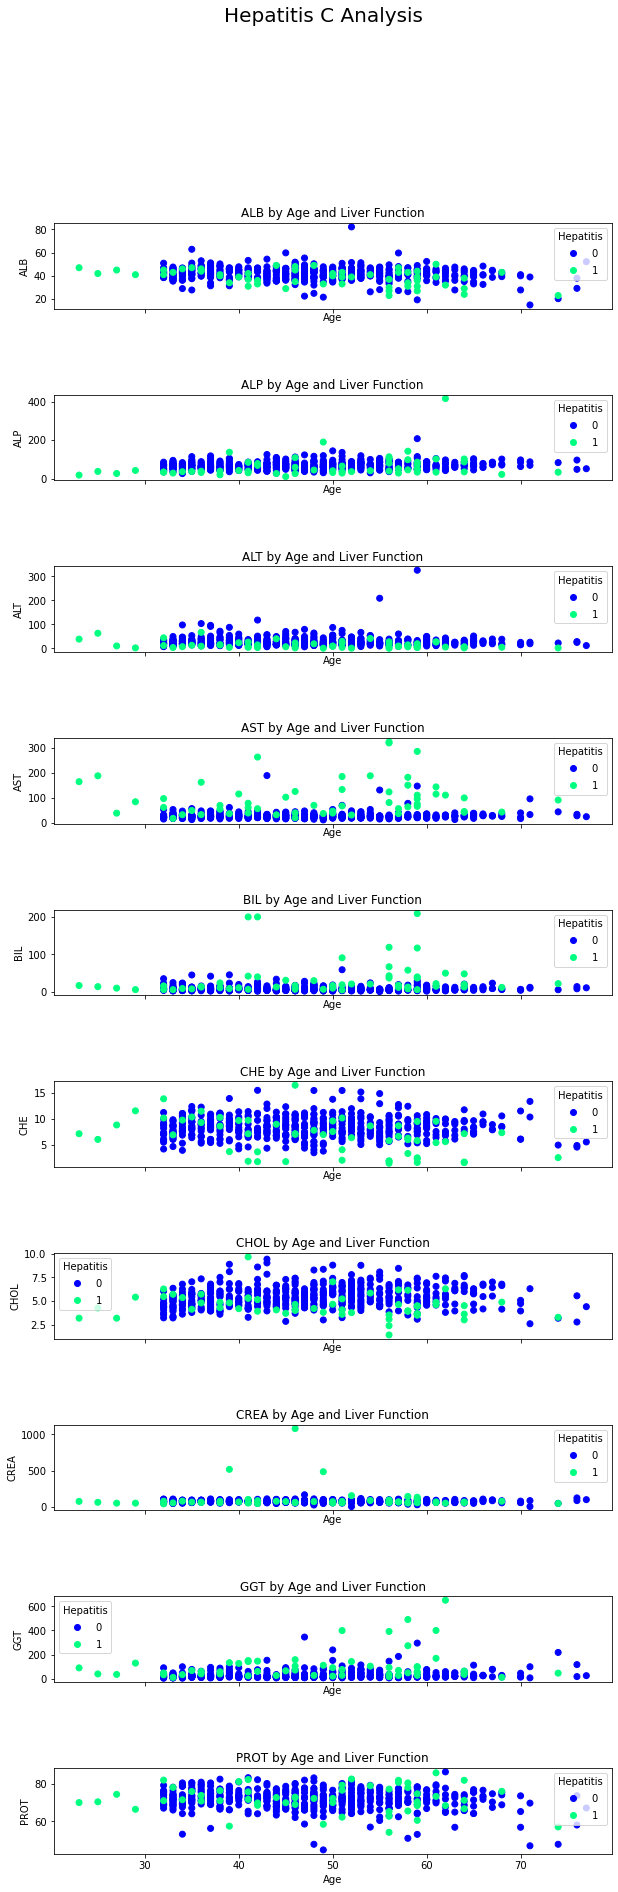

In [97]:
# Let's Create some visualizations for the data: We will create a plot for each variable as it relates to age
fig,ax= plt.subplots(nrows=len(plotting_columns),ncols=1,sharex=True, figsize=(10,30))
fig_data = data.copy()
X = data['Age']
for i in range(len(plotting_columns)):
    y = data[plotting_columns[i]]
    scatter = ax[i].scatter(x=X,y=y,c=data['Category'], cmap='winter')
    ax[i].set(title=f'{plotting_columns[i]} by Age and Liver Function', xlabel='Age', ylabel=plotting_columns[i])
    ax[i].legend(*scatter.legend_elements(), title='Hepatitis')
plt.subplots_adjust(hspace=1)
fig.suptitle('Hepatitis C Analysis', size=20)
fig.savefig('Hepatitis C Analysis')
;

## Plotting Conclusions

* The data can't be used for prediction for those under 33 years old
    All individuals have Hepatitis C and the model used will assume that with such strong correlation, all future individuals in that age range will have Hepatitis C too.
* Correlation is slight for any single factor: there is a high degree of overlap, although the two population do have visible trends: Higher AST levels and lower ALT for individuals with Hepatitis.

## Creating a Predictions Model 

In [102]:
# We also need to use numerical data for the sex column
data['Sex'].loc[data['Sex']=='m']=1
data['Sex'].loc[data['Sex']=='f']=0
#Check if the formatting is correct
data.head(),data.dtypes

C:\Users\fritz\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(   Unnamed: 0 Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL  \
 0           1        0   32   1  38.5  52.5   7.7  22.1   7.5   6.93  3.23   
 1           2        0   32   1  38.5  70.3  18.0  24.7   3.9  11.17  4.80   
 2           3        0   32   1  46.9  74.7  36.2  52.6   6.1   8.84  5.20   
 3           4        0   32   1  43.2  52.0  30.6  22.6  18.9   7.33  4.74   
 4           5        0   32   1  39.2  74.1  32.6  24.8   9.6   9.15  4.32   
 
     CREA   GGT  PROT  
 0  106.0  12.1  69.0  
 1   74.0  15.6  76.5  
 2   86.0  33.2  79.3  
 3   80.0  33.8  75.7  
 4   76.0  29.9  68.7  ,
 Unnamed: 0      int64
 Category       object
 Age             int64
 Sex            object
 ALB           float64
 ALP           float64
 ALT           float64
 AST           float64
 BIL           float64
 CHE           float64
 CHOL          float64
 CREA          float64
 GGT           float64
 PROT          float64
 dtype: object)

In [103]:
# Our category and sex columns are still object types. They need to be int
data['Sex']=data['Sex'].astype('int')
data['Category']=data['Category'].astype('int')

In [105]:
#Now we will split the data
from sklearn.model_selection import train_test_split
# The X variable will be all fields except for liver condition. We also only need one sex column 
X= data.drop('Category', axis=1)
# The Y variable will be a single liver condition column
y= data['Category']
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_preds = knn.predict(x_test)
accuracy_score(y_preds,y_test)

0.9915254237288136

This Model seems to work incredibly well. It has a high amount of accuracy and consistency despite only a middling amount of data.
